In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import seaborn as sns

In [2]:
##df = pd.read_csv('data/bgg_db_2018_01.csv', encoding='iso-8859-1') 
#most up to date ^
#df_1 = pd.read_csv('data/bgg_db_2017_04.csv', encoding='iso-8859-1')
#df_2 = pd.read_csv('data/bgg_db_1806.csv')

In [3]:
#df = df.drop(['bgg_url', 'image_url', 'avg_time'], axis=1)
#bgg_url and image_url unnecessary 
#avg_time has exact same values as max_time

In [4]:
#df = df.set_index('rank')

In [5]:
#df.head()

In [6]:
#df['geek_rating'].describe()

In [7]:
#3.472 
#8.522

## Decision Tree and Evaluation

In [8]:
df = pd.read_csv('/Users/admin/flatiron/ds_mod3/mod3_project/data/bgg_binned_2018.csv', index_col=0)
df.head()

,rank,game_id,names,min_players,max_players,avg_time,min_time,max_time,geek_rating,age,...,cat_travel,cat_trivia,cat_video_game_theme,cat_vietnam_war,cat_wargame,cat_word_game,cat_world_war_i,cat_world_war_ii,cat_zombies,cat_none
0,1,174430,Gloomhaven,1,4,150,90,150,8.52234,12,...,0,0,0,0,0,0,0,0,0,0
1,2,161936,Pandemic Legacy: Season 1,2,4,60,60,60,8.49837,13,...,0,0,0,0,0,0,0,0,0,0
2,3,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,8.32401,14,...,0,0,0,0,0,0,0,0,0,0
3,4,12333,Twilight Struggle,2,2,180,120,180,8.21012,13,...,0,0,0,0,1,0,0,0,0,0
4,5,167791,Terraforming Mars,1,5,120,120,120,8.17328,12,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_columns = list(df.columns)
df_columns

['rank',
 'game_id',
 'names',
 'min_players',
 'max_players',
 'avg_time',
 'min_time',
 'max_time',
 'geek_rating',
 'age',
 'mechanic',
 'category',
 'weight',
 'mech_acting',
 'mech_action__movement_programming',
 'mech_action_point_allowance_system',
 'mech_area_control__area_influence',
 'mech_area_enclosure',
 'mech_area_movement',
 'mech_area-impulse',
 'mech_auctionbidding',
 'mech_bettingwagering',
 'mech_campaign__battle_card_driven',
 'mech_card_drafting',
 'mech_chit-pull_system',
 'mech_co-operative_play',
 'mech_commodity_speculation',
 'mech_crayon_rail_system',
 'mech_deck__pool_building',
 'mech_dice_rolling',
 'mech_grid_movement',
 'mech_hand_management',
 'mech_hex-and-counter',
 'mech_line_drawing',
 'mech_memory',
 'mech_modular_board',
 'mech_paper-and-pencil',
 'mech_partnerships',
 'mech_pattern_building',
 'mech_pattern_recognition',
 'mech_pick-up_and_deliver',
 'mech_player_elimination',
 'mech_point_to_point_movement',
 'mech_press_your_luck',
 'mech_rock-

In [10]:
df['top_score'] = df['geek_rating'].apply(lambda x: 1 if x >= 6.289785 else 0)
#df['avg_time'] = (df['min_time'] + df['max_time']) / 2

In [11]:
df.describe()

,rank,game_id,min_players,max_players,avg_time,min_time,max_time,geek_rating,age,weight,...,cat_trivia,cat_video_game_theme,cat_vietnam_war,cat_wargame,cat_word_game,cat_world_war_i,cat_world_war_ii,cat_zombies,cat_none,top_score
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.000000,84623.393479,2.027205,5.377475,115.241648,85.148030,114.826565,6.082797,10.357872,2.348847,...,0.008202,0.015003,0.003401,0.189638,0.013803,0.012202,0.068414,0.011402,0.007001,0.250050
std,1443.231328,74844.219116,0.681943,16.075743,509.802841,317.587406,509.850801,0.482280,3.281167,0.801396,...,0.090200,0.121577,0.058222,0.392054,0.116683,0.109800,0.252480,0.106182,0.083389,0.433085
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.636190,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.500000,10304.500000,2.000000,4.000000,30.000000,30.000000,30.000000,5.720640,8.000000,1.741300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2500.000000,66116.000000,2.000000,4.000000,60.000000,45.000000,60.000000,5.901470,11.000000,2.294100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3749.500000,155214.000000,2.000000,6.000000,120.000000,90.000000,120.000000,6.289785,12.000000,2.884900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
max,4999.000000,237087.000000,8.000000,999.000000,22500.000000,17280.000000,22500.000000,8.522340,42.000000,4.904800,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
X = df.drop(['rank', 'game_id', 'names', 'geek_rating', 'avg_time',
              'cat_none', 'mech_none', 'top_score', 'category', 'mechanic'], axis=1)

y = df['top_score']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
dtc = DecisionTreeClassifier(max_depth=4, min_samples_split=5)





In [15]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
dtc_pred = dtc.predict(X_test)

In [17]:
accuracy_score(y_test, dtc_pred)

0.7616

In [18]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       961
           1       0.45      0.14      0.21       289

   micro avg       0.76      0.76      0.76      1250
   macro avg       0.62      0.54      0.54      1250
weighted avg       0.71      0.76      0.71      1250



In [19]:
#dtc.feature_importances_

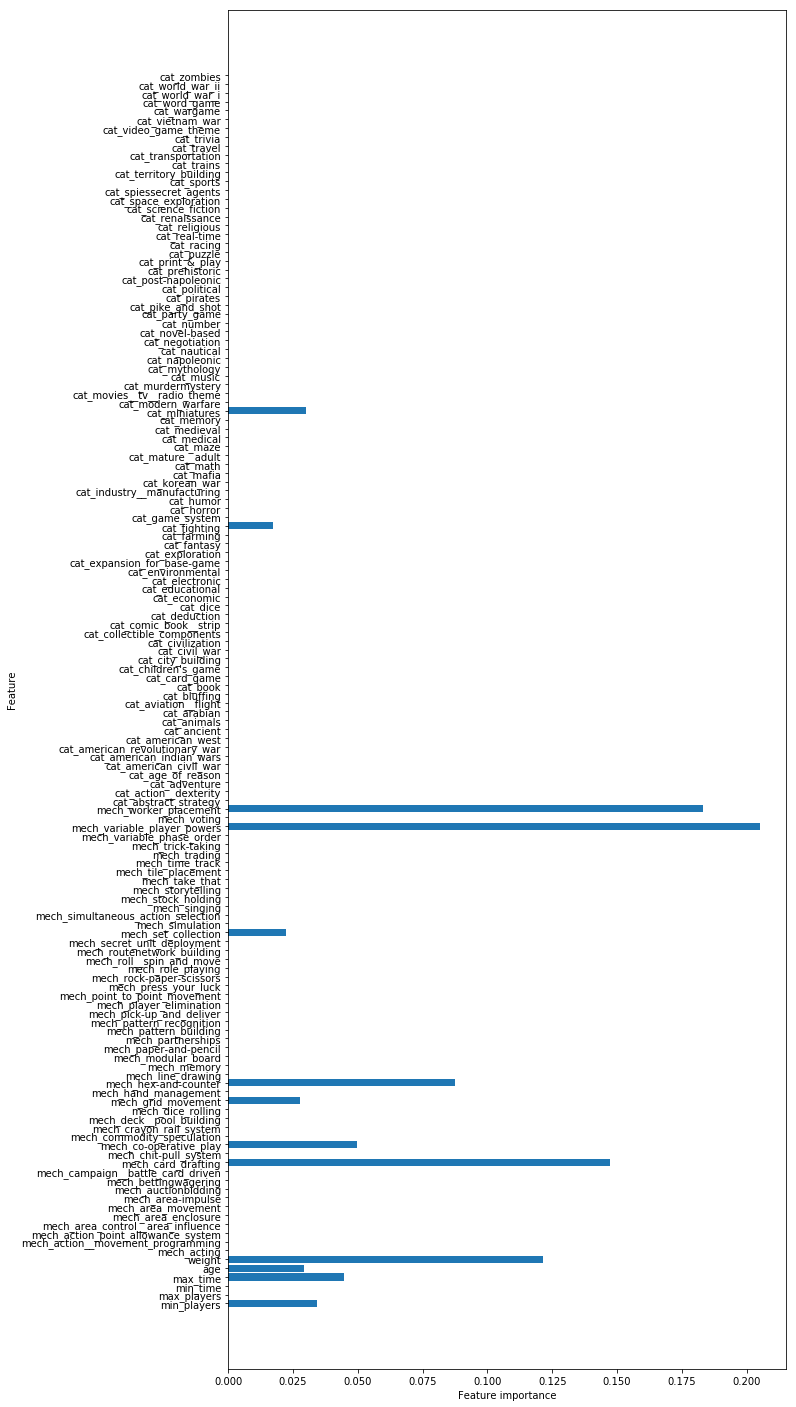

In [20]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10,25))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")


plot_feature_importances(dtc)

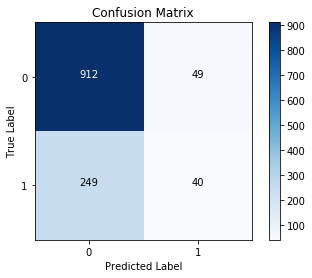

In [21]:
def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

show_cf(y_test, dtc_pred)

## Random Forest

In [22]:
forest = RandomForestClassifier(min_samples_split=5, n_estimators=30)

In [23]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
forest_pred = forest.predict(X_test)

In [25]:
accuracy_score(y_test, forest_pred)

0.8024

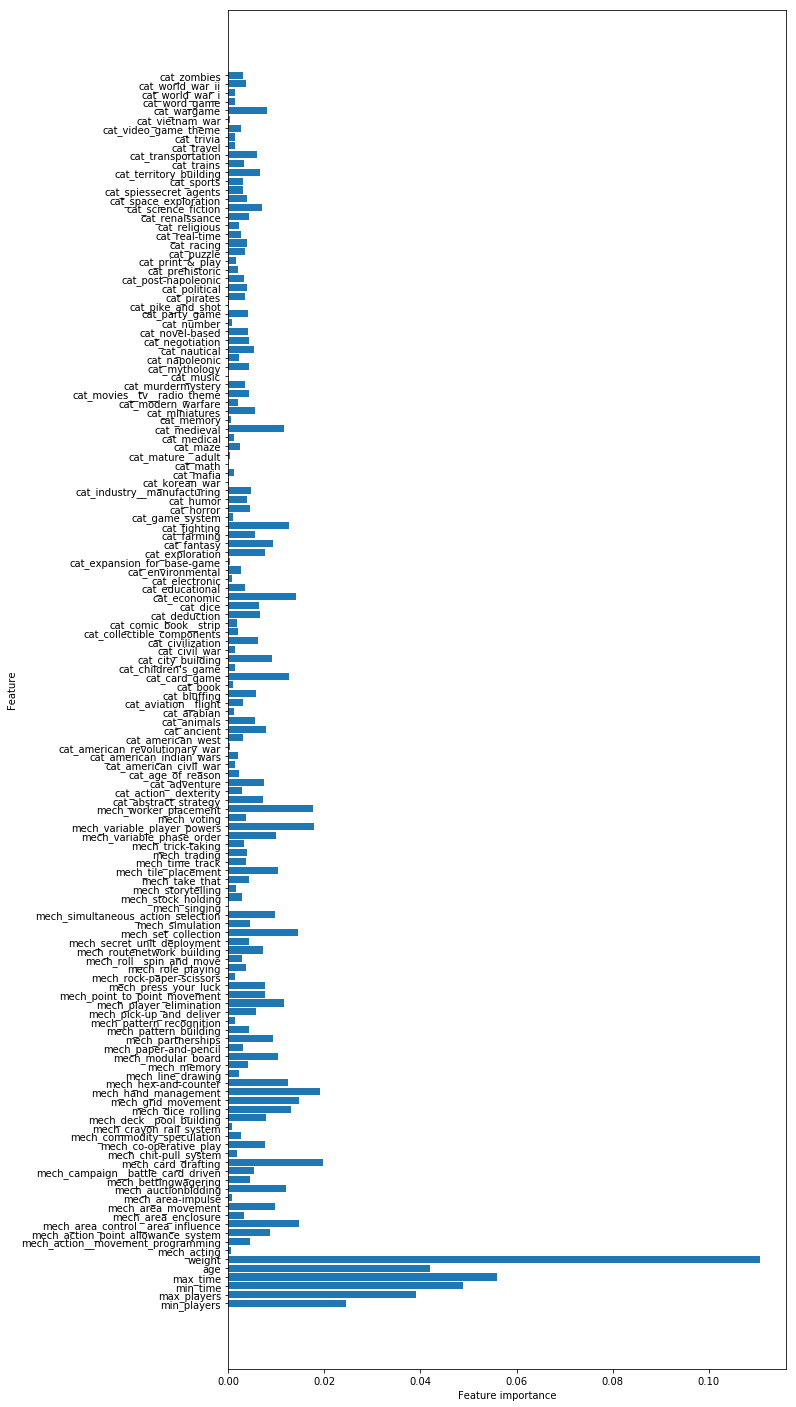

In [26]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10,25))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(forest)

## Bagged tree

In [27]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10)

In [28]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [29]:
bagged_tree.score(X_train, y_train)

0.9786609762603361

## XGBoost

In [30]:
from xgboost import XGBClassifier

In [31]:

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [32]:
xgb = XGBClassifier()

In [33]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [34]:
xgb_pred = xgb.predict(X_test)

In [35]:
accuracy_score(y_test, xgb_pred)

0.784

## Gradient Boosting

In [36]:
gbt_clf = GradientBoostingClassifier()

In [37]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [38]:
gbt_pred = gbt_clf.predict(X_test)

In [39]:
accuracy_score(y_test, gbt_pred)

0.7832

## Logistic Regression, ROC Curve

In [40]:
logreg = LogisticRegression(max_iter=175, solver='liblinear', penalty="l1") #Starter code
model_log = logreg.fit(X_train, y_train)
print(model_log) #Preview model params

#Predict
logreg_pred = logreg.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=175, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


In [41]:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [42]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7448123890555183


AUC: 0.7448123890555183


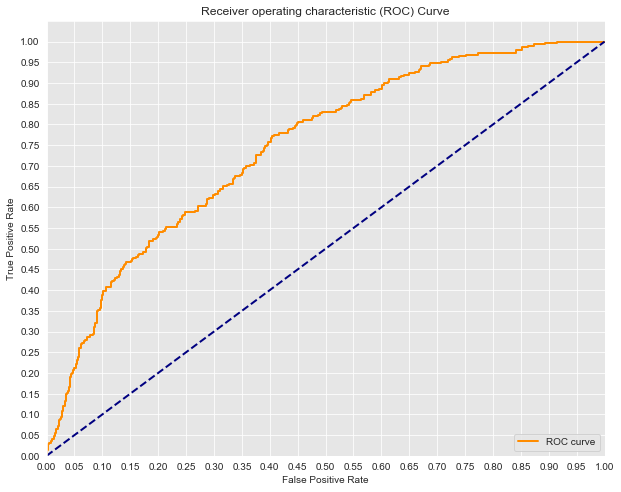

In [43]:
#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [240]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       966
           1       0.68      0.68      0.68       909

   micro avg       0.69      0.69      0.69      1875
   macro avg       0.69      0.69      0.69      1875
weighted avg       0.69      0.69      0.69      1875



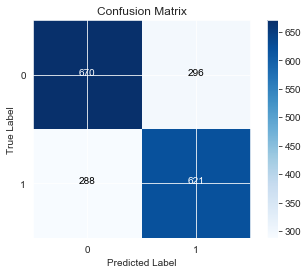

In [241]:
show_cf(y_test, logreg_pred)

In [242]:
y_log_pred = logreg.predict_proba(X_test)

In [243]:
loss = log_loss(y_test, y_log_pred)
loss

0.5984236249297132

**SMOTE for Logistic Regression**

In [244]:
from imblearn.over_sampling import SMOTE, ADASYN

In [245]:
print(y.value_counts()) #Previous original class distribution
X_resampled, y_resampled = SMOTE().fit_sample(X, y) 
print(pd.Series(y_resampled).value_counts())

0    3749
1    1250
Name: top_score, dtype: int64
1    3749
0    3749
dtype: int64


In [246]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)


In [247]:
logreg_pred = logreg.predict(X_test)

In [248]:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [249]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7544106570303131


AUC: 0.7544106570303131


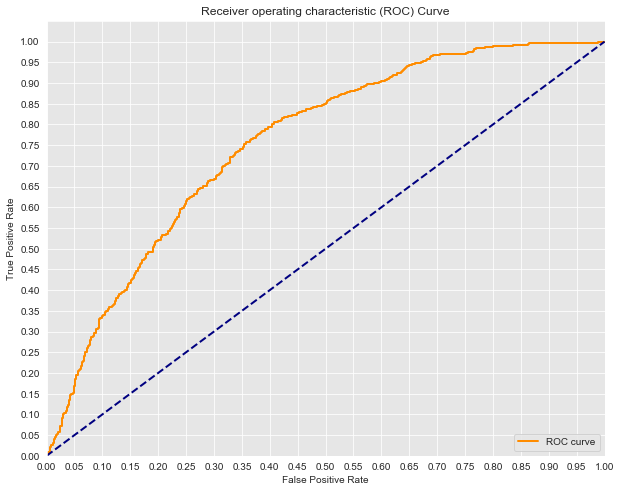

In [250]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [251]:
y_log_pred_smote = logreg.predict_proba(X_test)

In [252]:
loss_smote = log_loss(y_test, y_log_pred_smote)
loss_smote

0.5941366241005167

## GridSearch

**Decision Tree**

In [253]:
#param_grid_dtc = {
 #   "criterion": ["gini", "entropy"],
  #  "max_depth": [3, 4, 5],
   # "min_samples_split": [5, 6, 7],
    #"min_samples_leaf": [1, 2]
#}

In [254]:
#gs_tree_dtc = GridSearchCV(dtc, param_grid_dtc, cv=3)

In [255]:
#gs_tree_dtc.fit(X_train, y_train)

In [256]:
#gs_tree_dtc.best_params_

**Random Forest**

In [57]:
#param_grid_forest = {
 #   "n_estimators": [25, 28, 30, 32],
  #  "criterion": ["gini", "entropy"],
   # "max_depth": [None, 3],
    #"min_samples_split": [4, 5, 6],
    #"min_samples_leaf": [1, 2]
#}

In [58]:
#gs_tree_forest = GridSearchCV(forest, param_grid_forest, cv=3)

In [59]:
#gs_tree_forest.fit(X_train, y_train)

In [60]:
#gs_tree_forest.best_params_

**XGBoost**

In [61]:
#param_grid_xgb = {
 #   "learning_rate": [0.1, 0.2, 0.3],
  #  'max_depth': [4, 5, 6],
   # 'min_child_weight': [1, 2, 3],
    #'subsample': [1, 2, 3],
    #'n_estimators': [150, 200],
#}

In [62]:
#gs_tree_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3)

In [63]:
#gs_tree_xgb.fit(X_train, y_train)

In [64]:
#gs_tree_xgb.best_params_

**Logistic Regression**

In [ ]:
#logreg = LogisticRegression(solver='lbfgs')

In [232]:
param_grid_logreg = {
    "max_iter": [170, 175, 180],
    "penalty": ["l1", "l2"]
}

In [233]:
gs_tree_logreg = GridSearchCV(logreg, param_grid_logreg, cv=3)

In [234]:
gs_tree_logreg.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=175, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_iter': [170, 175, 180], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [235]:
gs_tree_logreg.best_params_

{'max_iter': 170, 'penalty': 'l1'}